# matplotlib入门

官网网页
https://matplotlib.org/

### 安装
- 使用`pip`安装

```bash
    python -m pip install -U pip
    python -m pip install -U matplotlib
```


In [1]:
#pip install matplotlib --user
#引入matplotlib包
import matplotlib.pyplot as plt
import numpy as np

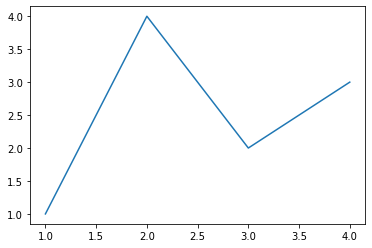

In [2]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the axes.

`plt.subplots()`函数返回两个对象
+ fig 图形对象
+ ax 坐标轴对象
当然如果不需要操作坐标轴的话，也可以直接使用`plot`函数
```python
plt.plot([2,3,5,6],[2,4,5,6])```

In [ ]:
plt.plot([2,3,5,6],[2,4,5,6]) #直接使用plot函数

#### 更加深入的理解图片的构造
![figure图片构造](https://matplotlib.org/_images/anatomy.png)


In [8]:
figure=plt.figure() ##没有坐标轴的空白图片,啥也看不到

<Figure size 432x288 with 0 Axes>

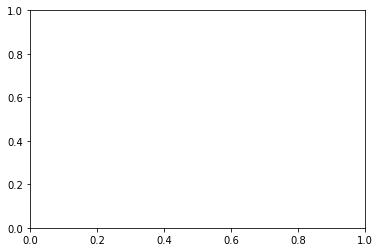

In [13]:
fig,ax=plt.subplots() ##带坐标轴的空白图片,只有单个坐标轴

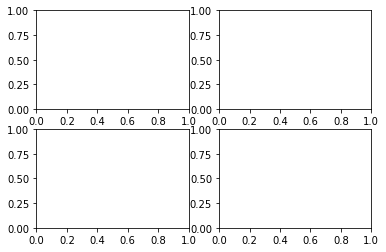

In [15]:
fig,axs=plt.subplots(2,2) ##2x2的四坐标轴图片

## Axes对象
+ 通常Axes就是包含data的一个图片
+ 一张figure可以有多个Axes
+ 而一个Axes只属于某一个figure
+ Axes包含有两个或者3个Axis（坐标轴）
+ Axes类似于ggplot分面中的一个分面

对坐标轴中显示数据范围的控制
```python
axes.Axes.set_xlim() ##控制X轴显示范围
axes.Axes.set_ylim() ##控制y轴显示范围
```
控制坐标轴标签与图形标签
```python
axes.Axes.set_title() ##图片标签
axes.Axes.set_xlabel() ##x轴标签
axes.Axes.set_ylabel() ##y轴标签
```
控制图例名称和显示图例
```python
axes.plot(data,label="图例名")
axes.legend()

```

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('qt5agg')
fig,axs=plt.subplots(2,1) ## 绘制2X1 图片
axs[0].plot([1,2,3,4],[4,5,6,7],label="liner1") #第一张图，以及图例
axs[0].plot([2,4,5,6],[4,5,6,7],label="liner2") #第一张图，以及图例
axs[1].plot([1,6,7,8],[5,6,7,8],label="test") # 第二张图 以及图例
for item in axs:   #批量设置标题 和图例
    item.set_xlim(0,10)
    item.set_xlabel('x label')
    item.set_ylabel('y label')
    item.set_title('test')
    item.legend()
plt.savefig("test.png")

# Axis对象
+ 用于设置坐标轴范围
+ 控制坐标轴上显示的标记，` Locator`对象
+ 控制坐标轴上显示的字符 `Formatter`对象

# Artist
基本上所有的figure都会用到Artist对象，并且Artist是与Axes对象绑定在一起使用的。Artist对象就包含以下几个对象
+ Text
+ Line2D
+ collection
+ Patch

# 输入数据格式
所有的绘图数据都是基于`numpy.array`类型进行的，当然有些类似array的数据类型，例如`pandas`中的dataFrame,`numpy`中的matrix;这些数据类型作为输入数据时，可能不能够正常的工作，所有还是将它们转换成`numpy.array`之后再绘制图片吧

+ ####  将panda 数据框转换
```python
import numpy as np
import pandas
a=pandas.DataFrame(np.random.rand(4,5), columns = list('abcde')) ##获取4x5的随机数据框
print(a)
          a         b         c         d         e
0  0.505938  0.742418  0.732312  0.008823  0.559201
1  0.834437  0.657429  0.136503  0.654495  0.841873
2  0.725788  0.746307  0.240214  0.732954  0.119796
3  0.452142  0.172521  0.103506  0.472862  0.744575
a_array=a.values
print(a) ##看起来没变化，实质上一个是数据框，一个是数组
          a         b         c         d         e
0  0.505938  0.742418  0.732312  0.008823  0.559201
1  0.834437  0.657429  0.136503  0.654495  0.841873
2  0.725788  0.746307  0.240214  0.732954  0.119796
3  0.452142  0.172521  0.103506  0.472862  0.744575
```
+ #### 将numpy.matrix转换
```python
import numpy as np
b = np.matrix([[1, 2], [3, 4]])
print(b)
[[1 2]
 [3 4]]
b_asarray = np.asarray(b)
print(b)
[[1 2]
 [3 4]]
```


# pyplot两种绘图方式

+ #### 面向对象的方式
这种在写脚本的时候，可以封装成函数，在不修改代码的情况下，仅仅改变数据就可以获得不同的图片。用的比较多；不涉及与用户的交互

```python
    import matplotlib.pyplot as plt
    x=np.linspace(0, 2, 100)
    fig,ax=plt.subplots()
    ax.plot(x,x,label='liner')
    ax.legend()
```
+ #### 直接调用pyplot方法
这个有点类似ggplot2，在jupyter中用的频繁。不过个人还是比较喜欢用第一种面向对象的方式，毕竟对象嘛..

```python
    import matplotlib.pyplot as plt
    x=np.linspace(0, 2, 100)
    plt.plot(x,x,label="liner")
    plt.legend()
```
+ #### 还有[第三种](https://matplotlib.org/tutorials/introductory/usage.html#the-object-oriented-interface-and-the-pyplot-interface)，之后遇到在看吧




# 如何导出图片
文档里用了一个词`BacKends`，意思就是针对不同的需求，导出不同类型的图片

+ #### AGG 支持png
+ #### PS 支持ps、eps
+ #### PDF 支持pdf
+ #### SVG 支持svg
+ #### Cairo 支持png ps pdf svg

#### 配置
一般来说不用配置，能够根据系统自动检测，
linux中配置一下环境变量即可
```bash
$ export MPLBACKEND=qt5agg
$ python simple_plot.py
##或者
$ MPLBACKEND=qt5agg python simple_plot.py
```
在脚本内部配置
```python
import matplotlib
matplotlib.use('qt5agg')
##导出图片
matplotlib.pyplot.savefig('filename')
```

